HR analytics Problem(Analytics Vidhya Hackathon) 

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test_2umaH9m.csv to test_2umaH9m.csv


In [0]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
HR = pd.read_csv('train_LZdllcl.csv')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:

HR.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
print(HR.isna().sum())
print(HR.info())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%  

In [0]:

HR['education'].mode()
HR['education'].fillna(HR['education'].value_counts().index[0],inplace=True)
HR['previous_year_rating'].fillna(HR['previous_year_rating'].median(),inplace=True)
HR['education']  = HR['education'].fillna(HR['education'].mode())
print(HR['education'].value_counts().index[0])

Bachelor's


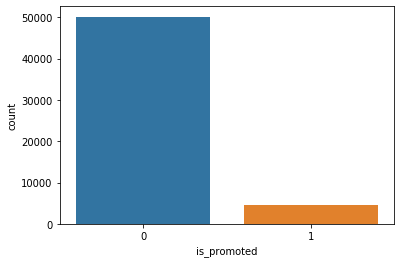

In [0]:
sns.countplot(HR['is_promoted'])
plt.show()

In [0]:
HR1 = HR[['department','region','education','gender','recruitment_channel']]

In [0]:
HR = HR.drop(['department','region','education','gender','recruitment_channel'],axis = 1)


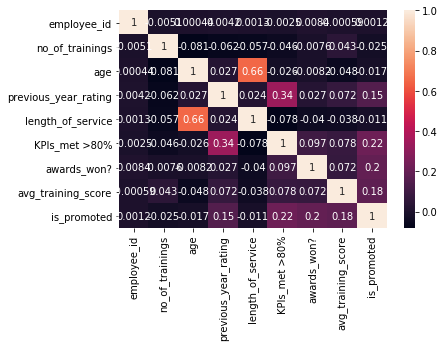

In [0]:
sns.heatmap(data=HR.corr(), annot=True)

In [0]:
#use one hot encoder for categorica variables
onehotencoder = OneHotEncoder() 
  
HR1 = onehotencoder.fit_transform(HR1).toarray() 
HR1 = pd.DataFrame(HR1)
HR = pd.concat([HR, HR1], axis=1, sort=False)
HR.isna().sum()

employee_id             0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
0                       0
1                       0
2                       0
3                       0
4                       0
5                       0
6                       0
7                       0
8                       0
9                       0
10                      0
11                      0
12                      0
13                      0
14                      0
15                      0
16                      0
17                      0
18                      0
19                      0
20                      0
21                      0
22                      0
23                      0
24                      0
25                      0
26                      0
27                      0
28                      0
29          

In [0]:
#split data into features and output
scaler = StandardScaler()
X = HR.drop(['is_promoted'],axis=1)
y= HR['is_promoted']




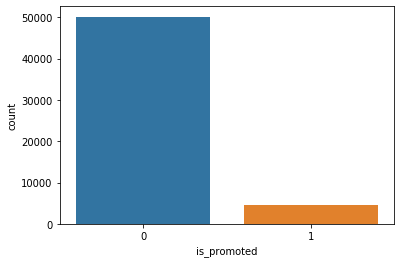

In [0]:
#check the distribution of y
sns.countplot(y)

In [0]:
#Build a logistic regression 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Build a logistic regression
LR = LogisticRegression(C=76)
LR.fit(X_train,y_train)
#check F1 score
from sklearn.metrics import f1_score
y_pred = LR.predict((X_test))
f1_score(y_test, y_pred)

0.4013212221304708

In [0]:
#decision tree implementation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
scaler = StandardScaler()
X_trainDR, X_testDR, y_trainDR, y_testDR = train_test_split(X, y, test_size=.30, random_state=1)
X_trainDR = scaler.fit_transform(X_trainDR)
X_testDR = scaler.transform(X_testDR)
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state= 50 )
dt_model.fit(X_trainDR, y_trainDR)
y_predict = dt_model.predict(X_testDR)
#check f1 score
f1_score(y_testDR,y_predict)


0.44529616724738674

In [0]:
#Bagging with decision tree
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_trainDR, y_trainDR)
y_predict1 = bgcl.predict(X_testDR)

f1_score(y_testDR,y_predict1)

0.5089605734767025

In [0]:

#random forest implementation

scaler = StandardScaler()
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X, y, test_size=.30, random_state=1)
X_trainRF = scaler.fit_transform(X_trainRF)
X_testRF = scaler.transform(X_testRF)
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True
                               )
# Fit on training data
model.fit(X_trainRF, y_trainRF)
# Actual class predictions
y_predRF = model.predict(X_testRF)
#check the f1 score
f1_score(y_testRF,y_predRF)

0.4002235885969816

0.4131038312048862

In [0]:
#XGboost implmentation
scaler = StandardScaler()
seed = 7
test_size = 0.2
X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(X, y, test_size=test_size, random_state=20)
X_trainXG = scaler.fit_transform(X_trainXG)
X_testXG = scaler.transform(X_testXG)
# fit model no training data

model1 =  XGBClassifier(
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=1,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=37)

model1.fit(X_trainXG, y_trainXG)
y_predXG = model1.predict(X_testXG)



In [0]:
f1_score(y_testXG,y_predXG)


0.5044897959183673

In [0]:
#for test data prediction
HR_test = pd.read_csv('test_2umaH9m.csv')
HR_test['education'].mode()
HR_test['education'].fillna(HR_test['education'].value_counts().index[0],inplace=True)
HR_test['previous_year_rating'].fillna(HR_test['previous_year_rating'].median(),inplace=True)
#HR_test['education']  = HR_test['education'].fillna(HR_test['education'].mode())
HR2 = HR_test[['department','region','education','gender','recruitment_channel']]
HR_test = HR_test.drop(['department','region','education','gender','recruitment_channel'],axis = 1)
onehotencoder = OneHotEncoder() 
HR2 = onehotencoder.fit_transform(HR2).toarray() 
HR2 = pd.DataFrame(HR2)
HR_test = pd.concat([HR_test, HR2], axis=1, sort=False)
HR_test1 = scaler.transform(HR_test)
#predict the output
y_testLR = model1.predict(HR_test1)
HR_test['is_promoted'] = y_testLR
print(HR_test['is_promoted'].describe())
HR_output = HR_test[['employee_id','is_promoted']]
from google.colab import files
HR_output.to_csv('Output2.csv',index=False,sep = ',')

count    23490.000000
mean         0.029034
std          0.167904
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_promoted, dtype: float64


In [0]:
from google.colab import drive
drive.mount('/content/drive')